# BOSQUES ALEATORIOS (Random Forest)

Los Bosques Aleatorios (Random Forest) son un conjunto de árboles de decisión entrenados con la técnica de *bagging* para mejorar la precisión y reducir el sobreajuste.

Son útiles tanto para tareas de **clasificación** como de **regresión**, y destacan por su capacidad para manejar datos con alta dimensionalidad y detectar relaciones no lineales.

### Pasos iniciales

Importamos las librerías necesarias para trabajar con modelos de Random Forest.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score

### Clasificación - Dataset de Diabetes

Utilizaremos el dataset de los indios Pima para predecir la presencia de diabetes.

In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
columnas = ['NumEmbarazos', 'Glucosa', 'PresionSanguinea', 'PliegueCutaneo',
            'Insulina', 'IMC', 'Pedigree', 'Edad', 'Diabetes']

diabetes = pd.read_csv(url, names=columnas)
diabetes.head()

,NumEmbarazos,Glucosa,PresionSanguinea,PliegueCutaneo,Insulina,IMC,Pedigree,Edad,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Entrenamiento del Random Forest Classifier

In [3]:
X = diabetes.drop('Diabetes', axis=1)
y = diabetes['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### Evaluación del modelo de clasificación

In [4]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[77 22]
 [21 34]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



### Regresión - Dataset de Boston

Utilizamos el dataset de Boston Housing para predecir el precio de las viviendas.

In [ ]:
# Cargar el conjunto de datos de Boston
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston_data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
boston_target = raw_df.values[1::2, 2]

column_names = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
# Las variables son:
# CRIM: Tasa de criminalidad per cápita por ciudad
# ZN: Proporción de terrenos residenciales divididos en zonas para lotes de más de 25,000 pies cuadrados
# INDUS: Proporción de acres comerciales no minoristas por ciudad
# CHAS: Variable ficticia de Charles River (1 si el tramo limita con el río; 0 en caso contrario)
# NOX: Concentración de óxidos nítricos (partes por 10 millones)
# RM: Número medio de habitaciones por vivienda
# AGE: Proporción de unidades ocupadas por sus propietarios construidas antes de 1940
# DIS: Distancias ponderadas a cinco centros de empleo de Boston
# RAD: Índice de accesibilidad a autopistas radiales
# TAX: Tasa de impuesto a la propiedad de valor total por $10,000
# PTRATIO: Proporción alumno-maestro por ciudad
# B: 1000(Bk - 0.63)^2 donde Bk es la proporción de personas de ascendencia afroamericana por ciudad
# LSTAT: Porcentaje de la población con estatus socioeconómico bajo

X_b = pd.DataFrame(boston_data, columns=column_names)
y_b = pd.Series(boston_target)

Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_b, y_b, test_size=0.2, random_state=42)

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_63947/3394488022.py:5: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


### Entrenamiento del Random Forest Regressor

In [9]:
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(Xb_train, yb_train)
yb_pred = reg.predict(Xb_test)

### Evaluación del modelo de regresión

In [10]:
print(f"Error cuadrático medio (MSE): {mean_squared_error(yb_test, yb_pred):.2f}")
print(f"R² Score: {r2_score(yb_test, yb_pred):.2f}")

Error cuadrático medio (MSE): 7.90
R² Score: 0.89


### Importancia de variables

En los siguientes gráficos se puede ver el nivel de importancia que adquiere cada variable para el modelo. Usando `feature_importances_` se obtiene un array con la importancia de cada variable, que ha sido calculada durante el entrenamiento del modelo.     

El parámetro `index`se usa para asignar los nombres de las columnas a las importancias correspondientes.

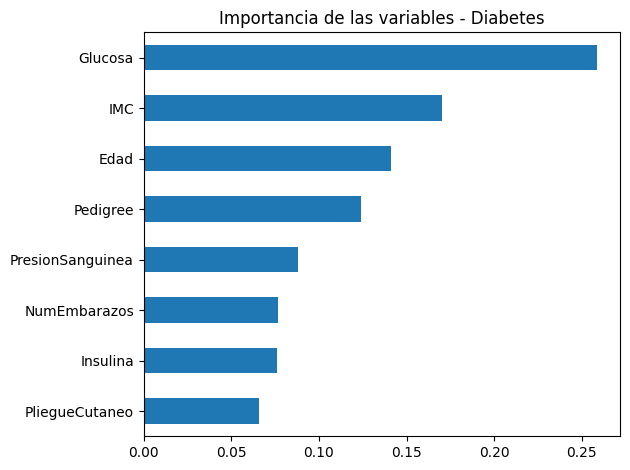

In [ ]:
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title='Importancia de las variables - Diabetes')
plt.tight_layout()
plt.show()

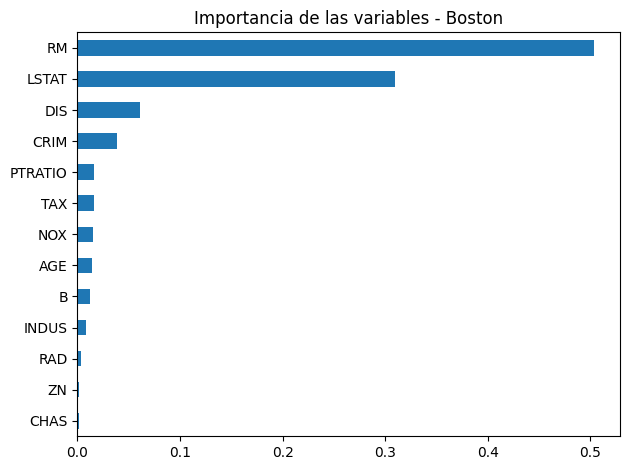

In [15]:
importances = pd.Series(reg.feature_importances_, index=X_b.columns)
importances.sort_values().plot(kind='barh', title='Importancia de las variables - Boston')
plt.tight_layout()
plt.show()

### Comparación: Árbol de decisión vs Bosque aleatorio

- Un único árbol de decisión puede sobreajustar los datos de entrenamiento.
- Un bosque aleatorio reduce este riesgo al combinar múltiples árboles entrenados con subconjuntos diferentes.
- Mejora la generalización y la robustez del modelo.

### ¿Qué es Bagging?

**Bagging** (*Bootstrap Aggregating*) es una técnica de ensamblado que permite mejorar la precisión y estabilidad de los modelos de aprendizaje automático. Es especialmente efectiva con modelos de alta varianza como los árboles de decisión.

#### Funcionamiento:
1. Se generan múltiples subconjuntos del conjunto de datos original mediante *muestreo con reemplazo*.
2. A cada subconjunto se le entrena un modelo independiente (en este caso, un árbol de decisión).
3. Para clasificación: se toma una **votación mayoritaria**.
4. Para regresión: se calcula el **promedio de predicciones**.

El objetivo es reducir el **sobreajuste** (overfitting) al suavizar las predicciones individuales, lo que da lugar a un modelo más robusto y preciso.

### Principales hiperparámetros de Random Forest

A continuación se listan los hiperparámetros más comunes que puedes ajustar al usar `RandomForestClassifier` o `RandomForestRegressor`:

| Parámetro | Descripción |
|-----------|-------------|
| `n_estimators` | Número de árboles en el bosque. Por defecto suele ser 100. |
| `max_depth` | Profundidad máxima de cada árbol. Controla el sobreajuste. |
| `min_samples_split` | Número mínimo de muestras para dividir un nodo. |
| `min_samples_leaf` | Número mínimo de muestras en una hoja. |
| `max_features` | Número máximo de características consideradas para dividir un nodo. Puede ser `'auto'`, `'sqrt'`, `'log2'` o un número entero. |
| `bootstrap` | Si se usan muestras con reemplazo (por defecto `True`). |
| `criterion` | Función para medir la calidad de una división (`'gini'`, `'entropy'` para clasificación; `'squared_error'`, `'absolute_error'` para regresión). |
| `random_state` | Semilla para la generación aleatoria, útil para reproducibilidad. |

> ⚙️ **Consejo**: Utilizar técnicas de búsqueda como *Grid Search* o *Random Search* ayuda a encontrar la combinación óptima de hiperparámetros.

## 🧠 Ejercicios de consolidación

1. **Ajusta el número de árboles (`n_estimators`) del modelo RandomForestClassifier. ¿Cómo afecta a la precisión?**
2. **Modifica el criterio de partición (`criterion`) y evalúa los cambios en el rendimiento.**
3. **Aplica el modelo a otro dataset de clasificación de `sklearn.datasets`.**
4. **En el caso de regresión, prueba con otros hiperparámetros como `max_depth` o `min_samples_split`.**
5. **Visualiza gráficamente la importancia de variables del regresor. ¿Qué variables influyen más en el precio de la vivienda?**